<a href="https://colab.research.google.com/github/danidb29/Laboratorios-AnalisisDatos/blob/main/Laboratorio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:


*   Andrés Carvajal López
*   Daniel Delgado Bernini
*   Abrahám Quesada Mora
*   Adrián Solís Matamoros










Clustering en Python hace referencia al proceso de separar y agrupar diferentes partes de un conjunto de datos según características comunes. Estas agrupaciones de datos permiten observar patrones que a simple vista están ocultos. Existen tres métodos diferentes para clustering: K-Means, Gaussian Mixture Model y Spectral Clustering.

El método de K-Means es un algoritmo de machine learning sin supervisión. Se agrupan los datos según características específicas más cercanas. Los clusters se encuentran en puntos donde el promedio está más cercano a cada conjunto de datos agrupado.

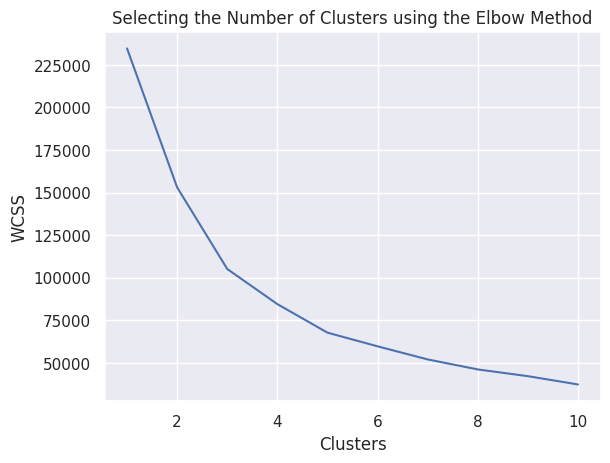

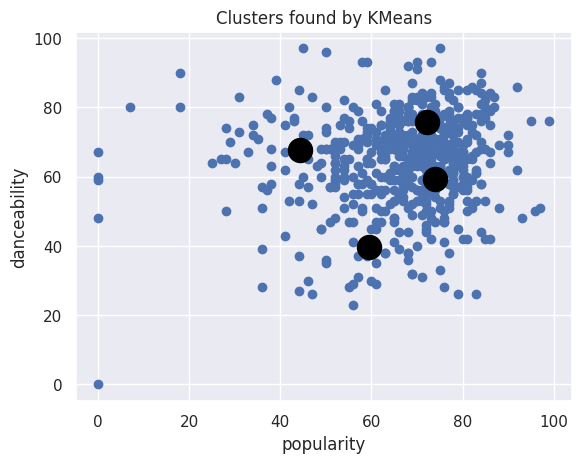

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

csv = pd.read_csv("spotify_top_music.csv")

df = pd.DataFrame(csv)
df = df.rename(columns={
    "bpm":"beats per minute",
    "nrgy":"energy",
    "dnce":"danceability",
    "dB":"decibels",
    "live":"liveness",
    "val":"valence",
    "dur":"duration in seconds",
    "acous":"acousticness",
    "spch":"speechiness",
    "pop":"popularity"
})

df

#Para este ejemplo, se va a utilizar K-Means sobre las columnas popularity y danceability,
#para observar qué patrones están presentes relacionando estas dos características.
X = df[['popularity', 'danceability']]
wcss = []
#Se va a utilizar el método del codo para representar los K óptimos dentro de los K clusters.
#Por lo tanto, se define una lista de la suma de los cuadrados entre clusters o WCSS según sus siglas en inglés.

#Se define la cantidad de clusters en el siguiente for loop.
#Además, se agregan los datos de la inercia de cada cluster a la lista de WCSS.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Con la ayuda de seaborn, se grafica el método del codo para determinar la cantidad óptima de clusters.
sns.set()

plt.plot(range(1, 11), wcss)
plt.title('Selecting the Number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

print("\n")

#Se grafican los clusters con los datos. Se setea  como la cantidad óptima de clusters.
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=20, random_state=0)
y_pred = kmeans.fit_predict(X)
plt.scatter(X['popularity'], X['danceability'])
plt.ylabel("danceability")
plt.xlabel("popularity")
plt.title("Clusters found by KMeans")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
plt.show()


Del primer gráfico se puede observar que el codo de la curva se presenta en 4, por lo que esta es la cantidad óptima de clusters.

La interpretación de los clusters es la siguiente:
1. Canciones con popularidad baja que son moderamente bailables
2. Canciones con popularidad moderada que no son tan  bailables
3. Canciones con popularidad elevada que son altamente bailables
4. Canciones con la popularidad mas alta  que son moderamente bailables

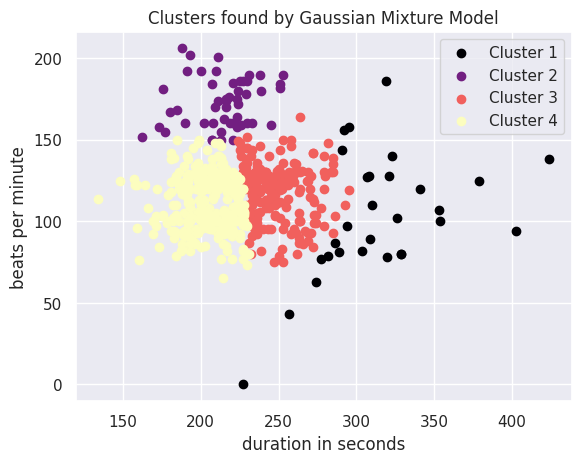

In [ ]:
#Como segundo ejemplo, se utilizará Gaussian Mixture sobre las columnas duration in seconds y beats per minute,
# esto con el objetivo de visualizar los clusters de datos que se han identificado.

from sklearn.mixture import GaussianMixture

#Se crea el objeto y se ajusta un modelo de Mixture Gaussian a los datos, con 4 componentes.

gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(df[['duration in seconds', 'beats per minute']])

#Se hace la predicción a cuál de los clusters pertenece cada punto de datos en función de las columnas.

gmm_labels = gmm.predict(df[['duration in seconds', 'beats per minute']])

#Finalmente se grafican los clusters con los datos recibidos por el Gaussian Mixture Model.

colors = plt.get_cmap('magma', 4)

# Finalmente se grafican los clusters con los datos recibidos por el Gaussian Mixture Model.

cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
cmap = plt.get_cmap('magma')
for i in range(len(cluster_labels)):
    plt.scatter(df['duration in seconds'][gmm_labels==i],df['beats per minute'][gmm_labels == i],c=[cmap(i/(len(cluster_labels)-1))],label=cluster_labels[i])
plt.ylabel("beats per minute")
plt.xlabel("duration in seconds")
plt.title("Clusters found by Gaussian Mixture Model")
plt.legend()
plt.show()

De este segundo gráfico se puede ver la distribución del cluster en 4 componentes, los cuales se dividen en:

1. Cluster Canciones con una duración moderada en segundos y beats per minute moderado.

2. Canciones con una duración más larga en segundos y beats per minute moderado.

3. Canciones con una duración moderada en segundos pero con beats per minute rápido.

4. Canciones con una duración más corta en segundos y beats per minute rápido.


<ipython-input-5-d4504ab4d3ef>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = spectral_cluster_model.fit_predict(X[['popularity', 'beats per minute']])


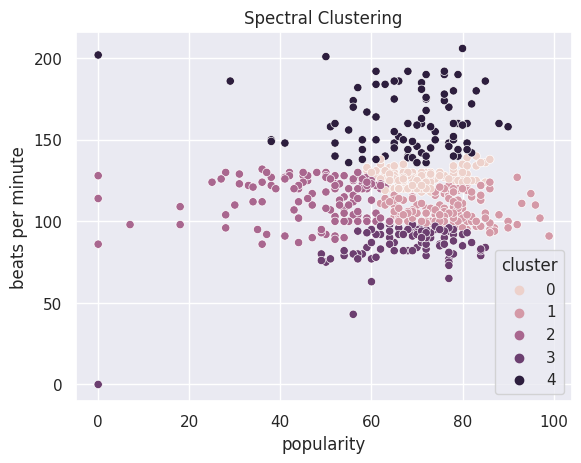

In [ ]:
# Este metodo se utiliza para datos mas complejos y bases de datos con muchos mas registros

from sklearn.cluster import SpectralClustering

#Se crea el objeto con los parametros inicilaes, en este caso decimos que queremos 5 clusters
spectral_cluster_model= SpectralClustering(
    n_clusters=5,
    random_state=25,
    n_neighbors=8,
    affinity='nearest_neighbors'
)

#Se saca la parte que queremos analizar en este caso la popularidad con los beats por minuto
X = df[['popularity', 'beats per minute']]

#se crea el cluster en una columna de esta nueva copia que creamos del df
X['cluster'] = spectral_cluster_model.fit_predict(X[['popularity', 'beats per minute']])
fig, ax = plt.subplots()

#con sns se grafica un sactterplot
sns.scatterplot(x='popularity', y='beats per minute', data=X, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering')
plt.show()

La informacion y las conclusione que podemos sacar de los clusters son:


*   Cluster 0: Se encuentra bastante concentrado entre popularidad de 60 a 80 y bpm de 125 a 150

*   Cluster 1:Este cluster se encunetra concentrado pero ligeramente disperso en popularidad entre 60 a 100 y 100 a 125 en bpm

*   Cluster 2: Este cluster tiene mucha dispersidad entre los puntos y aun asi es bastante concentrado en otros puntos, se encuentra desde 0 a 60 en popularidad y 50 a 125 en bpm

*   Cluster 3: Tenemos que este cluster se encuntra muy concentrado pero su minimo punto se encuentra totalmente distanciado su popularidad va entre 0 a 80 y en bpm de 0 a 100

*   Cluster 4: Este cluster se encuentra con una concentracion minima y sus puntos son muy disparejos entre su popularida va desde 0 a 90 y de 125 a 200 en bpm


Pierre, S. (2022, octubre 17). How to Form Clusters in Python: Data Clustering Methods | Built In. Built In. https://builtin.com/data-science/data-clustering-python






